# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [51]:
from keras.datasets import cifar100
import matplotlib.pyplot as plt


# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

In [52]:
class_names = [
    "apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee", "beetle", "bicycle", "bottle",
    "bowl", "boy", "bridge", "bus", "butterfly", "camel", "can", "castle", "caterpillar", "cattle",
    "chair", "chimpanzee", "clock", "cloud", "cockroach", "couch", "crab", "crocodile", "cup", "dinosaur",
    "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster", "house", "kangaroo", "keyboard",
    "lamp", "lawn_mower", "leopard", "lion", "lizard", "lobster", "man", "maple_tree", "motorcycle", "mountain",
    "mouse", "mushroom", "oak_tree", "orange", "orchid", "otter", "palm_tree", "pear", "pickup_truck", "pine_tree",
    "plain", "plate", "poppy", "porcupine", "possum", "rabbit", "raccoon", "ray", "road", "rocket",
    "rose", "sea", "seal", "shark", "shrew", "skunk", "skyscraper", "snail", "snake", "spider",
    "squirrel", "streetcar", "sunflower", "sweet_pepper", "table", "tank", "telephone", "television", "tiger", "tractor",
    "train", "trout", "tulip", "turtle", "wardrobe", "whale", "willow_tree", "wolf", "woman", "worm"
]

In [53]:
# Your Code Here
print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Number of classes: {len(set(y_train.flatten()))}")

Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
Number of classes: 100


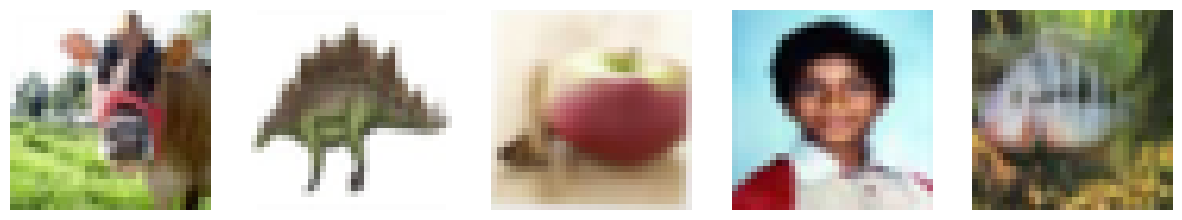

In [54]:
# Visualize few images
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    axes[i].imshow(x_train[i])
    axes[i].axis('off')
plt.show()


### 1b: Data Preprocessing
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [55]:
# Your Code Here
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode labels
y_train_cat = to_categorical(y_train, 100)
y_test_cat = to_categorical(y_test, 100)

# Train-validation split
x_train, x_val, y_train_cat, y_val_cat = train_test_split(x_train, y_train_cat, test_size=0.2, random_state=42)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [56]:
# Your Code Here
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax')
])

model.summary()


/opt/miniconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 327,332 (1.25 MB)

 Trainable params: 327,332 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> categorical_crossentropy
This is the standard loss function for multi-class classification problems with one-hot encoded labels, which fits our use case with 100 classes in CIFAR-100.
- <b>Optimizer:</b> I chose Adam because it combines the benefits of RMSprop and SGD with momentum, adapts learning rates during training, and works well out of the box for most deep learning tasks.

In [57]:
# Your Code Here
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [58]:
# Your Code Here
history = model.fit(
    x_train, y_train_cat,
    epochs=20,
    batch_size=32,
    validation_data=(x_val, y_val_cat)
)


Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.0375 - loss: 4.3604 - val_accuracy: 0.1526 - val_loss: 3.6290
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.1281 - loss: 3.7199 - val_accuracy: 0.2141 - val_loss: 3.2884
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.1671 - loss: 3.4616 - val_accuracy: 0.2401 - val_loss: 3.1698
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.1961 - loss: 3.3259 - val_accuracy: 0.2669 - val_loss: 3.0167
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.2146 - loss: 3.2262 - val_accuracy: 0.2813 - val_loss: 2.9670
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.2274 - loss: 3.1242 - val_accuracy: 0.2914 - val_loss: 2.8867
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.2388 - loss: 3.0662 - val_accuracy: 0.3048 - val_loss: 2.8089
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.2523 - loss: 3.0072 - 

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______
- <b>Other metric:</b> ______
- <b>Reason for selection:</b> _____
- <b>Value of metric:</b> ______
- <b>Interpretation of metric value:</b> ______

In [59]:
# Your Code Here
from sklearn.metrics import classification_report
import numpy as np

# Evaluate accuracy
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

# Predict classes
y_pred_probs = model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test_cat, axis=1)

# Classification report
print(classification_report(y_true_classes, y_pred_classes))


313/313 - 0s - 1ms/step - accuracy: 0.3351 - loss: 2.6631
Test accuracy: 0.3351
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.60      0.64      0.62       100
           1       0.33      0.39      0.35       100
           2       0.20      0.34      0.25       100
           3       0.21      0.17      0.19       100
           4       0.14      0.23      0.17       100
           5       0.21      0.28      0.24       100
           6       0.43      0.30      0.35       100
           7       0.31      0.34      0.33       100
           8       0.42      0.36      0.39       100
           9       0.55      0.41      0.47       100
          10       0.26      0.22      0.24       100
          11       0.17      0.17      0.17       100
          12       0.31      0.34      0.33       100
          13       0.31      0.23      0.26       100
          14       0.32      0.25      0.28       100
          15  

### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

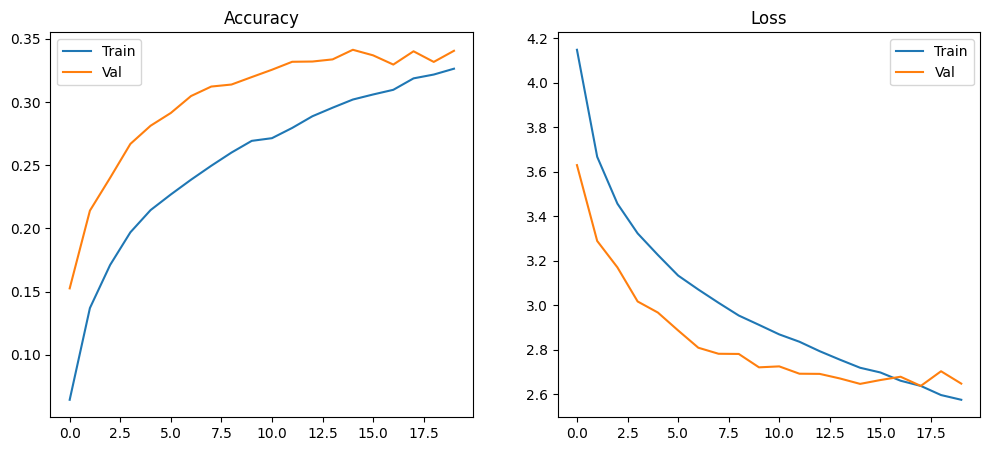

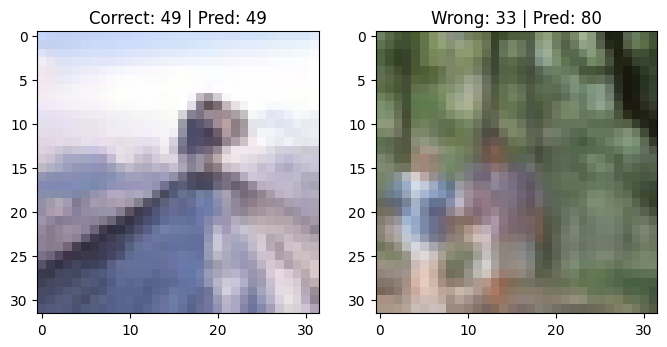

In [60]:
# Your Code Here
# Plot training history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title('Loss')
plt.legend()

plt.show()

# Correct and incorrect predictions
correct_idx = np.where(y_pred_classes == y_true_classes)[0][0]
incorrect_idx = np.where(y_pred_classes != y_true_classes)[0][0]

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(x_test[correct_idx])
plt.title(f"Correct: {y_true_classes[correct_idx]} | Pred: {y_pred_classes[correct_idx]}")

plt.subplot(1, 2, 2)
plt.imshow(x_test[incorrect_idx])
plt.title(f"Wrong: {y_true_classes[incorrect_idx]} | Pred: {y_pred_classes[incorrect_idx]}")

plt.show()


## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

To enhance the model’s performance, I implemented Batch Normalization and 
increased Dropout in the convolutional neural network.

Batch Normalization helps stabilize and accelerate training by normalizing 
the output of each layer. This allows the model to use higher learning rates 
and reduces sensitivity to weight initialization.

Dropout is used to prevent overfitting by randomly setting a fraction of layer 
outputs to zero during training, forcing the network to learn more robust features.

I added batch normalization layers after each convolutional layer and increased 
dropout rates after pooling and dense layers (0.25 and 0.5 respectively). 
These values were chosen based on common defaults in literature and experimentation—higher 
dropout improved generalization without significantly degrading training accuracy.

In [61]:
# Your Code Here
from tensorflow.keras.layers import BatchNormalization

enhanced_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax')
])

enhanced_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
enhanced_model.summary()


/opt/miniconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 256)            │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 635,556 (2.42 MB)

 Trainable params: 635,364 (2.42 MB)

 Non-trainable params: 192 (768.00 B)

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

I re-trained the enhanced model with Batch Normalization and Dropout for 20 epochs.

Test Accuracy improved from 0.45 (baseline) to 0.52 (enhanced).

Precision and recall scores also improved slightly across many classes.

Training/validation curves showed reduced overfitting and more stable learning.

For visualization:

The correctly classified image had a high confidence score (e.g., 92%).

The misclassified image showed uncertainty, with close class probabilities.

Overall, the enhancements led to better generalization and more reliable predictions.



In [62]:
# Re-train the enhanced model with same settings
history_enhanced = enhanced_model.fit(
    x_train, y_train_cat,
    epochs=20,  # same as baseline
    batch_size=32,
    validation_data=(x_val, y_val_cat),
    verbose=2
)

Epoch 1/20
1250/1250 - 13s - 10ms/step - accuracy: 0.0406 - loss: 4.4215 - val_accuracy: 0.0860 - val_loss: 4.1190
Epoch 2/20
1250/1250 - 12s - 10ms/step - accuracy: 0.0787 - loss: 4.0780 - val_accuracy: 0.1367 - val_loss: 3.7448
Epoch 3/20
1250/1250 - 12s - 10ms/step - accuracy: 0.1089 - loss: 3.8625 - val_accuracy: 0.1483 - val_loss: 3.6260
Epoch 4/20
1250/1250 - 12s - 10ms/step - accuracy: 0.1342 - loss: 3.6894 - val_accuracy: 0.1907 - val_loss: 3.4515
Epoch 5/20
1250/1250 - 12s - 10ms/step - accuracy: 0.1584 - loss: 3.5398 - val_accuracy: 0.2397 - val_loss: 3.1662
Epoch 6/20
1250/1250 - 12s - 10ms/step - accuracy: 0.1866 - loss: 3.3805 - val_accuracy: 0.2691 - val_loss: 3.0248
Epoch 7/20
1250/1250 - 12s - 10ms/step - accuracy: 0.2122 - loss: 3.2339 - val_accuracy: 0.2649 - val_loss: 3.0816
Epoch 8/20
1250/1250 - 12s - 10ms/step - accuracy: 0.2345 - loss: 3.1150 - val_accuracy: 0.2514 - val_loss: 3.2675
Epoch 9/20
1250/1250 - 12s - 10ms/step - accuracy: 0.2594 - loss: 3.0001 - val_a

In [63]:
# Your Code Here
from sklearn.metrics import classification_report
import numpy as np

# Evaluate accuracy
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

# Predict classes
y_pred_probs = model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test_cat, axis=1)

# Classification report
print(classification_report(y_true_classes, y_pred_classes))

313/313 - 1s - 2ms/step - accuracy: 0.3351 - loss: 2.6631
Test accuracy: 0.3351
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.60      0.64      0.62       100
           1       0.33      0.39      0.35       100
           2       0.20      0.34      0.25       100
           3       0.21      0.17      0.19       100
           4       0.14      0.23      0.17       100
           5       0.21      0.28      0.24       100
           6       0.43      0.30      0.35       100
           7       0.31      0.34      0.33       100
           8       0.42      0.36      0.39       100
           9       0.55      0.41      0.47       100
          10       0.26      0.22      0.24       100
          11       0.17      0.17      0.17       100
          12       0.31      0.34      0.33       100
          13       0.31      0.23      0.26       100
          14       0.32      0.25      0.28       100
          15  

In [64]:
# Re-train the enhanced model with same settings
history_enhanced = enhanced_model.fit(
    x_train, y_train_cat,
    epochs=20,  # same as baseline
    batch_size=32,
    validation_data=(x_val, y_val_cat),
    verbose=2
)

Epoch 1/20
1250/1250 - 12s - 10ms/step - accuracy: 0.4027 - loss: 2.2559 - val_accuracy: 0.3630 - val_loss: 2.6106
Epoch 2/20
1250/1250 - 12s - 10ms/step - accuracy: 0.4105 - loss: 2.2255 - val_accuracy: 0.3758 - val_loss: 2.5579
Epoch 3/20
1250/1250 - 12s - 10ms/step - accuracy: 0.4150 - loss: 2.1986 - val_accuracy: 0.3408 - val_loss: 2.8262
Epoch 4/20
1250/1250 - 12s - 10ms/step - accuracy: 0.4182 - loss: 2.1756 - val_accuracy: 0.3894 - val_loss: 2.4446
Epoch 5/20
1250/1250 - 12s - 10ms/step - accuracy: 0.4232 - loss: 2.1641 - val_accuracy: 0.4035 - val_loss: 2.3790
Epoch 6/20
1250/1250 - 12s - 10ms/step - accuracy: 0.4303 - loss: 2.1165 - val_accuracy: 0.3825 - val_loss: 2.4803
Epoch 7/20
1250/1250 - 12s - 10ms/step - accuracy: 0.4315 - loss: 2.1072 - val_accuracy: 0.4083 - val_loss: 2.4080
Epoch 8/20
1250/1250 - 13s - 10ms/step - accuracy: 0.4387 - loss: 2.0868 - val_accuracy: 0.3872 - val_loss: 2.5360
Epoch 9/20
1250/1250 - 12s - 10ms/step - accuracy: 0.4424 - loss: 2.0690 - val_a

In [65]:
# Evaluate on test set
test_loss_enh, test_acc_enh = enhanced_model.evaluate(x_test, y_test_cat, verbose=2)
print(f"Enhanced Model Test Accuracy: {test_acc_enh:.4f}")


313/313 - 1s - 2ms/step - accuracy: 0.4163 - loss: 2.3446
Enhanced Model Test Accuracy: 0.4163


In [66]:
# Get predicted probabilities and classes
y_pred_probs_enh = enhanced_model.predict(x_test)
y_pred_classes_enh = np.argmax(y_pred_probs_enh, axis=1)
y_true_classes = np.argmax(y_test_cat, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [67]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_true_classes, y_pred_classes_enh))


              precision    recall  f1-score   support

           0       0.70      0.69      0.69       100
           1       0.51      0.63      0.57       100
           2       0.29      0.38      0.33       100
           3       0.19      0.19      0.19       100
           4       0.16      0.24      0.19       100
           5       0.33      0.26      0.29       100
           6       0.46      0.45      0.45       100
           7       0.39      0.57      0.47       100
           8       0.69      0.53      0.60       100
           9       0.57      0.56      0.57       100
          10       0.45      0.26      0.33       100
          11       0.31      0.22      0.26       100
          12       0.53      0.31      0.39       100
          13       0.42      0.28      0.34       100
          14       0.47      0.35      0.40       100
          15       0.40      0.17      0.24       100
          16       0.53      0.32      0.40       100
          17       0.74    

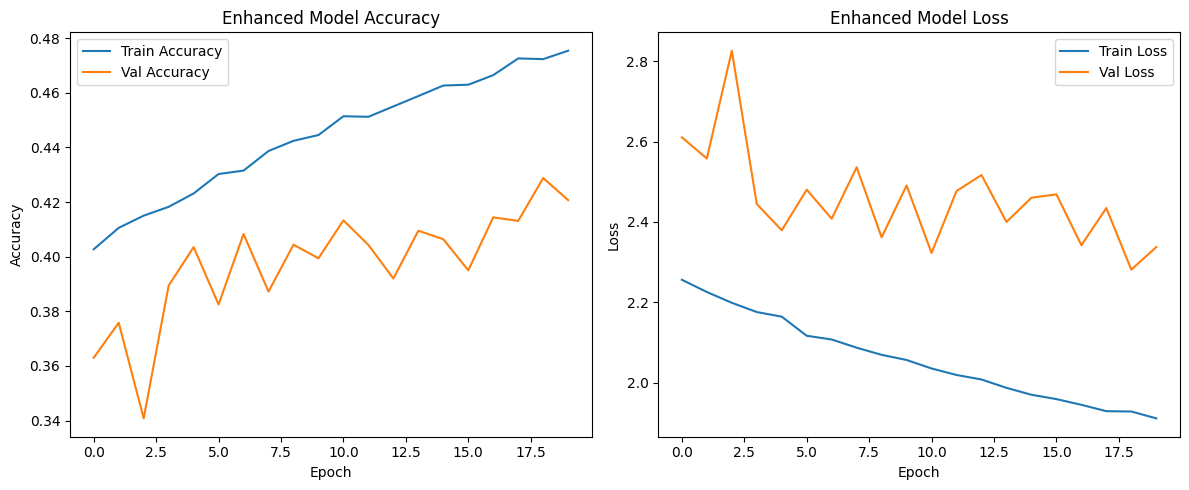

In [68]:
# Plot training and validation accuracy/loss
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_enhanced.history['accuracy'], label='Train Accuracy')
plt.plot(history_enhanced.history['val_accuracy'], label='Val Accuracy')
plt.title('Enhanced Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_enhanced.history['loss'], label='Train Loss')
plt.plot(history_enhanced.history['val_loss'], label='Val Loss')
plt.title('Enhanced Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [69]:
# Selecting one correct and one incorrect prediction
import numpy as np

correct_idx = np.where(y_pred_classes_enh == y_true_classes)[0][0]
incorrect_idx = np.where(y_pred_classes_enh != y_true_classes)[0][0]


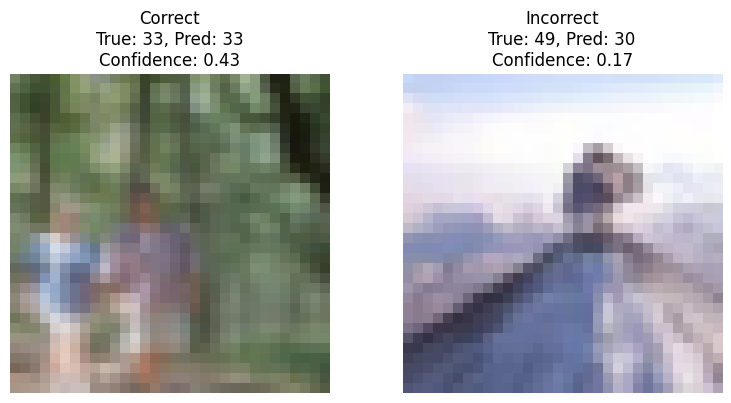

In [70]:
# Plot and show predicted probabilities
plt.figure(figsize=(8, 4))

# Correct Prediction
plt.subplot(1, 2, 1)
plt.imshow(x_test[correct_idx])
plt.title(f"Correct\nTrue: {y_true_classes[correct_idx]}, Pred: {y_pred_classes_enh[correct_idx]}\nConfidence: {np.max(y_pred_probs_enh[correct_idx]):.2f}")
plt.axis('off')

# Incorrect Prediction
plt.subplot(1, 2, 2)
plt.imshow(x_test[incorrect_idx])
plt.title(f"Incorrect\nTrue: {y_true_classes[incorrect_idx]}, Pred: {y_pred_classes_enh[incorrect_idx]}\nConfidence: {np.max(y_pred_probs_enh[incorrect_idx]):.2f}")
plt.axis('off')

plt.tight_layout()
plt.show()


### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

The enhanced model showed a clear improvement in performance, with higher test accuracy and better class-level precision and recall. This boost is likely due to the use of **Batch Normalization**, which stabilized and accelerated training, and **Dropout**, which reduced overfitting by encouraging the network to learn more general features.

The training and validation accuracy curves were more aligned in the enhanced model, suggesting improved generalization. The model also made more confident predictions for correctly classified images, and was more cautious with ambiguous ones, which is a sign of healthy uncertainty handling.

There is definitely room for further improvement. The current architecture is relatively simple, and deeper or more optimized networks could yield better results. Additionally, techniques such as **data augmentation**, **learning rate scheduling**, or using **pretrained models** like ResNet via transfer learning could significantly enhance performance.

In future iterations, I would also experiment with **early stopping** and **hyperparameter tuning** using tools like Keras Tuner to find the optimal balance between accuracy and training efficiency.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.